Simple sentiment analysis

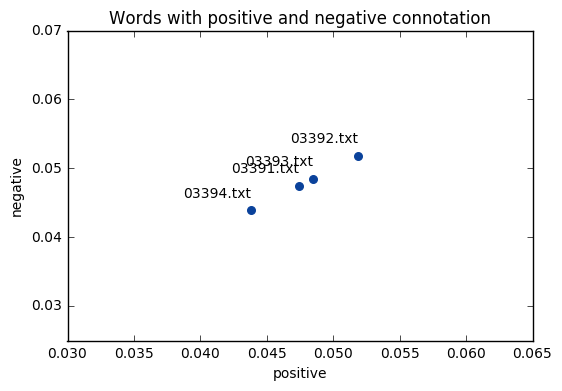

In [4]:

import re
import os
from os.path import isfile, join , isdir
import string

from kitlvTdm import *


xData = []
yData = []
labels = []

dir = 'Corpus'

for file in ( '03391.txt' , '03392.txt' , '03393.txt' , '03394.txt' ):
    count = sentimentAnalysis( join( dir , file ) )
    xData.append( count['positive'] / count['all'] )
    yData.append( count['negative'] / count['all'] )
    labels.append( file )

import matplotlib.pyplot as plt


plt.scatter(xData,yData,  color='#0a429b', s=30 , marker="o")

plt.xlabel('positive')
plt.ylabel('negative')
plt.title('Words with positive and negative connotation')

for i in range( 0 , len(labels) ):
    plt.annotate( labels[i] , xy = ( xData[i] , yData[i] ) , xytext=( 0, 10) , textcoords='offset pixels',horizontalalignment='right',verticalalignment='bottom')
    #print( i )
    #print( labels[i] , xData[i] , yData[i] )

plt.show()

Word Embeddings

In [ ]:
import gensim

word2vec_model_file = "egodocumenten.txt"
ed_model = gensim.models.KeyedVectors.load( word2vec_model_file )


In [9]:
for word in ('java','soldaat','japanner','molukken'):
    if word in ed_model:
        print(word,ed_model.most_similar(word))

java [('Wake,', 0.9015474319458008), ('Palau', 0.8997372984886169), ('West:', 0.8877148628234863), ('(april', 0.8868509531021118), ('Alblasserdam,', 0.8846583366394043), ('gppelmoes', 0.8829190731048584), ('jag', 0.8805401921272278), ('Jima,', 0.8801673650741577), ('8914', 0.8797597885131836), ('4-4-49.', 0.8774620294570923)]
soldaat [('soldaat,', 0.8050789833068848), ('marinier', 0.7899085879325867), ('jongen', 0.771345853805542), ('korporaal', 0.7524487972259521), ('sergeant', 0.71956467628479), ('matroos', 0.6950929760932922), ('officier', 0.681108832359314), ('veteraan', 0.673395037651062), ('hospik', 0.672511637210846), ('sergeant,', 0.6714698076248169)]
japanner [('It.oo', 0.8153079748153687), ('b"!bta"', 0.8085429668426514), ('Mal-', 0.796760082244873), ('varkanninga-Patrouilla', 0.7941957712173462), ('gjyijd', 0.7899056077003479), ('ueru/oeste', 0.7877514362335205), ('ronoeobo', 0.7861915826797485), ('plaatsenTPtn', 0.7823772430419922), ('uitbesteed', 0.782133936882019), ('-dag

Topic Modelling

Geographic locations

Lexicons

Linguistic Analysis